# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [1]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [2]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [3]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [4]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [5]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [6]:
# Check the result:

A @ x - b

array([  1.11022302e-16,   1.11022302e-16,  -1.11022302e-16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -1.38777878e-17,   0.00000000e+00,   2.77555756e-17,
         1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [7]:
def jac_pof(A, b, n_iter):
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)
    D = np.diag(diag_1d)
    invD = np.linalg.inv(D)
    B = invD @ B 
    C = invD @ b
    x = np.ones(A.shape[0])
    for _ in range(n_iter):
        x = B @ x + C
    return x, np.linalg.norm(B)

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

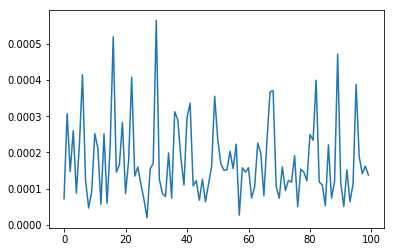

In [15]:
import matplotlib.pyplot as plt

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
    
error = []
for m in range(100):
    error.append(np.linalg.norm(A @ jac_pof(A,b,n)[0] - b)/np.linalg.norm(b))
    
plt.plot(error)
plt.show()

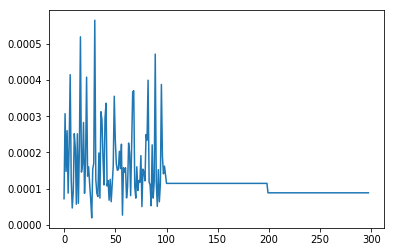

In [17]:
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

iter_error = []

for m in range(100):
    if m != 0:
        error.append(np.linalg.norm(jac_pof(A,b,n)[0] - jac_pof(A,b,n-1)[0]))

plt.plot(error)
plt.show()

# II. Seidel's iteration.

In [45]:
def seidel_iter(A, b, n_iter):
    diag_1d = np.diag(A)
    b = np.array(b)
    x = np.ones(len(b))
    D = np.diag(A)
    invD = np.diag(1./diag_1d)
    B = invD@(D - A)
   
    for i in range(n_iter):
        for j in range(len(b)):
            x[j] = (b[j] - A[j, :]@x)/A[j,j] + x[j]
    
    return x, np.linalg.norm(B)

In [47]:
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

print(np.linalg.norm(A @ seidel_iter(A,b,1000 * n)[0] - b)/np.linalg.norm(b))

6.105383793211382e-17


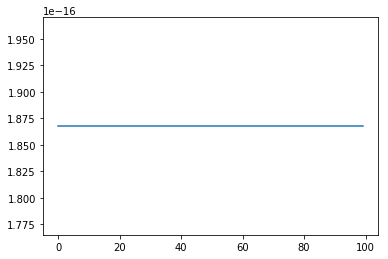

In [50]:
n = 100
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
    
error = []
for m in range(100):
    error.append(np.linalg.norm(A @ seidel_iter(A,b,n)[0] - b)/np.linalg.norm(b))
    
plt.plot(error)
plt.show()

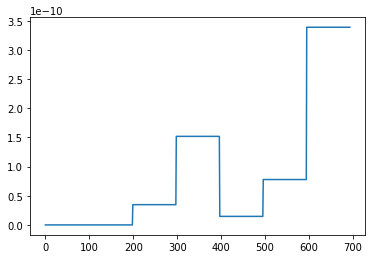

In [56]:
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

iter_error = []

for m in range(100):
    if m != 0:
        error.append(np.linalg.norm(seidel_iter(A,b,n)[0] - seidel_iter(A,b,n-1)[0]))

plt.plot(error)
plt.show()

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...